In [3]:
import os
import tweepy as tw
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import re
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
df = pd.read_csv('/content/grv_twitter_data.csv')
df.head(5)

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,0,Sanya_oluwafemi,2023-01-01 23:57:56+00:00,0,Twitter for Android,@Ashibuoguh @toyosi2405 @GRVlagos I don't even...
1,1,LUSTGARDEN2,2023-01-01 22:52:18+00:00,0,Twitter for Android,@Nizzy_dee @CrushunYoo @MuhyideenOlowo @Merije...
2,2,LUSTGARDEN2,2023-01-01 22:49:33+00:00,0,Twitter for Android,@Nizzy_dee @MuhyideenOlowo @CrushunYoo @Merije...
3,3,LUSTGARDEN2,2023-01-01 22:47:00+00:00,0,Twitter for Android,@Nizzy_dee @CrushunYoo @MuhyideenOlowo @Merije...
4,4,LUSTGARDEN2,2023-01-01 22:45:04+00:00,0,Twitter for Android,@Nizzy_dee @CrushunYoo @MuhyideenOlowo @Merije...


In [5]:
tweets = df.iloc[:, -1].values

In [6]:
tweets

array(["@Ashibuoguh @toyosi2405 @GRVlagos I don't even understand this people...",
       '@Nizzy_dee @CrushunYoo @MuhyideenOlowo @MerijeOkoro @tobehenry @GRVlagos @GRVlagos2023 We are talking about objective political discussion, you are talking about followers, I am not dragging twitter space with you, but your intellectual capacity to engage in political discussion with out recourse to tribal sentiment, intimidation and bigotry is so glaring.shif jare',
       "@Nizzy_dee @MuhyideenOlowo @CrushunYoo @MerijeOkoro @tobehenry @GRVlagos @GRVlagos2023 Which respect of territory, as a Nigerian citizen everybody has the right to live anywhere, once you  abide by the Nigerian law and to an extent the Norms of the community, so what's your noise about. Respecting territory. I have told you if it's easy Run am.",
       ..., '@marvixnaija @ehimaggie @GRVlagos You are right',
       'This govt has been at the helm of affairs for over 20 years. Yet, this is where we are! They are bereft of idea

In [7]:
processed_tweets = []

for sentence in range(0, len(tweets)):
    # Remove all the special characters.
    processed_tweet = re.sub(r'\W', ' ', str(tweets[sentence]))

    # Remove all single characters as a result of removing the special characters.
    processed_tweet= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)

    # Remove single characters from the start.
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 

    # Replace multiple spaces with a single space.
    processed_tweet = re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

    # Remove links from text.
    processed_tweet = re.sub(r'http\S+', '', processed_tweet)

    # Remove prefixed 'b'.
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

    processed_tweets.append(processed_tweet)

In [8]:
clean_tweets = pd.DataFrame({'tweet': processed_tweets})
clean_tweets.head(5)

,tweet
0,Ashibuoguh toyosi2405 GRVlagos don even under...
1,Nizzy_dee CrushunYoo MuhyideenOlowo MerijeOko...
2,Nizzy_dee MuhyideenOlowo CrushunYoo MerijeOko...
3,Nizzy_dee CrushunYoo MuhyideenOlowo MerijeOko...
4,Nizzy_dee CrushunYoo MuhyideenOlowo MerijeOko...


In [9]:
vader = SentimentIntensityAnalyzer()

function = lambda title: vader.polarity_scores(title)['compound']
clean_tweets['compound'] = clean_tweets['tweet'].apply(function)
clean_tweets

,tweet,compound
0,Ashibuoguh toyosi2405 GRVlagos don even under...,0.0000
1,Nizzy_dee CrushunYoo MuhyideenOlowo MerijeOko...,0.5927
2,Nizzy_dee MuhyideenOlowo CrushunYoo MerijeOko...,0.8481
3,Nizzy_dee CrushunYoo MuhyideenOlowo MerijeOko...,0.5423
4,Nizzy_dee CrushunYoo MuhyideenOlowo MerijeOko...,-0.8040
...,...,...
4996,When the city that someone built hid palliativ...,-0.8221
4997,NewageMr TYkrizkofficial ehimaggie SalauHamme...,0.3612
4998,marvixnaija ehimaggie GRVlagos You are right,0.0000
4999,This govt has been at the helm of affairs for ...,0.2023


In [10]:
def getAnalysis(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

clean_tweets['sentiment'] = clean_tweets['compound'].apply(getAnalysis)
clean_tweets

,tweet,compound,sentiment
0,Ashibuoguh toyosi2405 GRVlagos don even under...,0.0000,Neutral
1,Nizzy_dee CrushunYoo MuhyideenOlowo MerijeOko...,0.5927,Positive
2,Nizzy_dee MuhyideenOlowo CrushunYoo MerijeOko...,0.8481,Positive
3,Nizzy_dee CrushunYoo MuhyideenOlowo MerijeOko...,0.5423,Positive
4,Nizzy_dee CrushunYoo MuhyideenOlowo MerijeOko...,-0.8040,Negative
...,...,...,...
4996,When the city that someone built hid palliativ...,-0.8221,Negative
4997,NewageMr TYkrizkofficial ehimaggie SalauHamme...,0.3612,Positive
4998,marvixnaija ehimaggie GRVlagos You are right,0.0000,Neutral
4999,This govt has been at the helm of affairs for ...,0.2023,Positive


In [11]:
clean_tweets['sentiment'].value_counts()

Positive    2206
Neutral     1584
Negative    1211
Name: sentiment, dtype: int64

Text(0, 0.5, 'sanwoolu Sentiment')

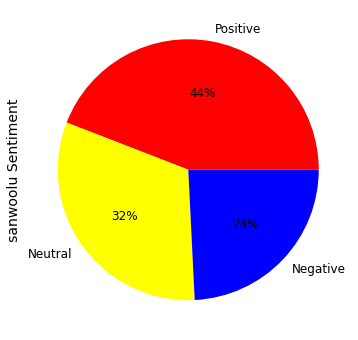

In [12]:
clean_tweets.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["red", "yellow", "blue"])
plt.ylabel("sanwoolu Sentiment", size=14)

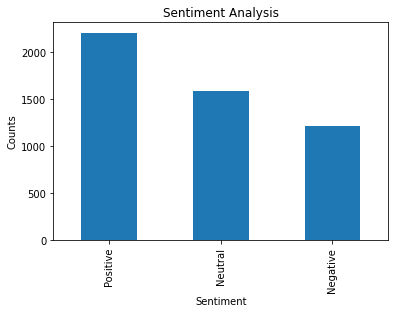

In [13]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
clean_tweets['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

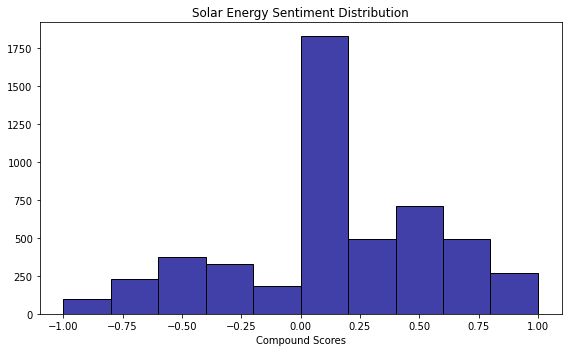

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(clean_tweets, x='compound', color="darkblue", bins=10, binrange=(-1, 1))
plt.title("Solar Energy Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()

In [15]:
features = clean_tweets.iloc[:, 0].values
labels = clean_tweets.iloc[:, -1].values

In [16]:
# Clean the text data by preprocessing it with regular expressions. 
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters.
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # Remove all single characters as a result of removing the special characters.
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start.
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substitute multiple spaces with a single space.
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Remove prefixed 'b'.
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Convert text to Lowercase.
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [19]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [20]:
# Create model object. 
model_rf = RandomForestClassifier(n_estimators = 200, random_state=0)
# Train the model on the training data.
model_rf.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test_data)

In [21]:
rf = accuracy_score(y_test_data, predictions_rf)
print(rf)

0.6753246753246753


In [22]:
print(classification_report(y_test_data, predictions_rf))

              precision    recall  f1-score   support

    Negative       0.69      0.28      0.40       236
     Neutral       0.68      0.81      0.74       362
    Positive       0.67      0.78      0.72       403

    accuracy                           0.68      1001
   macro avg       0.68      0.63      0.62      1001
weighted avg       0.68      0.68      0.65      1001



In [23]:
# Create model object. 
model_lr = LogisticRegression(max_iter=150)
# Train the model on the training data.
model_lr.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_lr = model_lr.predict(x_test_data)

In [24]:
lr = accuracy_score(y_test_data, predictions_lr)
print(lr)

0.7022977022977023


In [25]:
print(classification_report(y_test_data, predictions_lr))

              precision    recall  f1-score   support

    Negative       0.65      0.42      0.51       236
     Neutral       0.75      0.77      0.76       362
    Positive       0.68      0.80      0.74       403

    accuracy                           0.70      1001
   macro avg       0.69      0.67      0.67      1001
weighted avg       0.70      0.70      0.69      1001



In [26]:
# Create model object. 
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
# Train the model on the training data.
model_kn.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_kn = model_kn.predict(x_test_data)

In [27]:
kn = accuracy_score(y_test_data, predictions_kn)
print(kn)

0.3916083916083916


In [28]:
print(classification_report(y_test_data, predictions_kn))

              precision    recall  f1-score   support

    Negative       0.33      0.00      0.01       236
     Neutral       0.37      0.98      0.54       362
    Positive       0.86      0.09      0.16       403

    accuracy                           0.39      1001
   macro avg       0.52      0.36      0.24      1001
weighted avg       0.56      0.39      0.26      1001



In [29]:
# Create model object. 
model_sv = SVC()
# Train the model on the training data.
model_sv.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_sv = model_sv.predict(x_test_data)

In [30]:
sv = accuracy_score(y_test_data, predictions_sv)
print(sv)

0.6623376623376623


,Model,Accuracy_score
1,Logistic Regression,0.702298
0,Random Forest,0.675325
3,Support Vector Machine,0.662338
2,KNeighbours,0.391608


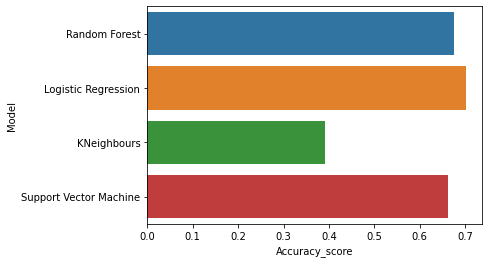

In [31]:
models = pd.DataFrame({
    'Model':['Random Forest', 'Logistic Regression', 'KNeighbours', 'Support Vector Machine'],
    'Accuracy_score' :[rf, lr, kn, sv]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)